# Aceleradev Codenation - Semana 3

## Importando os pacotes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data-sets/houses_to_rent_v2.csv')

In [3]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [4]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [5]:
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 918.9+ KB


## Problema: Explorar o valor do aluguel (rend amount RS)

### Estatística univariada

In [7]:
df.rename(columns = {'rent amount (R$)': 'valor_aluguel'}, inplace = True)

In [8]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [9]:
df['valor_aluguel']

0         3300
1         4960
2         2800
3         1112
4          800
         ...  
10687     1478
10688    15000
10689     6000
10690    12000
10691     1400
Name: valor_aluguel, Length: 10692, dtype: int64

In [10]:
df['valor_aluguel'].mean()

3896.247194163861

In [11]:
df['valor_aluguel'].median()

2661.0

In [12]:
# std alto, dados muito esparços
df['valor_aluguel'].std()

3408.5455176710675

In [13]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

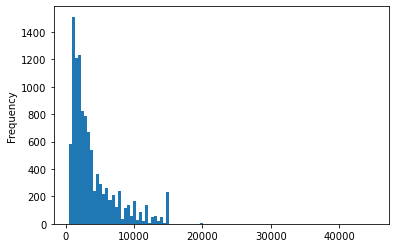

In [14]:
df['valor_aluguel'].plot(kind = 'hist', bins = 100)

In [15]:
# skewness positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [16]:
# kurtose - leptocurtica
df.valor_aluguel.kurtosis()

4.624228179818687

## Exploração multivariáveis

#### Perguntas
- Qual a cidade com a média de aluguel mais cara?
- Quantos banheiros existem nas residencias com alugueis mais caros?
- Os imóveis mais caros aceitam animal?
- Os imóveis mais caros são mobiliados?


#### Hipóteses
- São Paulo é a cidade com alguel mais caro.
- Quanto mais banheiros em uma imóvel, maior o valor do aluguel.
- Os imóveis com mobilia tem o aluguel mais alto.

In [17]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [18]:
# Qual a cidade com a média de aluguel mais alta?
df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [20]:
# Quantos banheiros em média existem nas residencias com alugueis mais altos? - mudamos a pergunta para em média
## definição: alugueis mais altos, vamos considerar que são alugueis acimas do percentil 75 (acima de 5000)
df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]

In [22]:
df['aluguel_alto'].value_counts()

Baixo    8153
Alto     2539
Name: aluguel_alto, dtype: int64

In [23]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [24]:
# Hipoteses

In [25]:
# Quanto mais banheiros em uma imóvel, maior o valor do aluguel.
## Analisaremos a correlação entre as variávies banheiro e valor do aluguel.
### correlacao de 0.668 > forte
df[['valor_aluguel', 'bathroom']].corr(method = 'pearson')

,valor_aluguel,bathroom
valor_aluguel,1.000000,0.668504
bathroom,0.668504,1.000000


In [30]:
aux = pd.DataFrame({'colunas': df.columns, 'tipos': df.dtypes})

In [33]:
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [35]:
for coluna in lista:
    print(coluna)
    print(df[['valor_aluguel', coluna]].corr(method = 'spearman'))

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000
fire insurance (R$)
          

# Visualização de Dados

In [37]:
import seaborn as sns

In [38]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$),aluguel_alto
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,Baixo
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,Baixo
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,Baixo
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,Baixo
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926,Baixo
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260,Alto
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390,Alto
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020,Alto


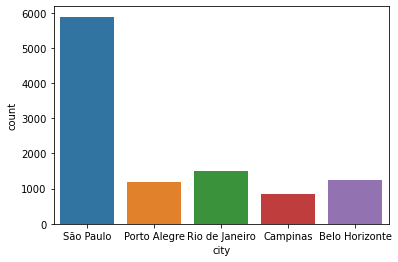

In [39]:
sns.countplot(x = 'city', data = df)

In [49]:
df['valor_aluguel'] = df['valor_aluguel'].astype(int)
sns.barplot(x = 'city', y = 'valor_aluguel', data = df)

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

In [42]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
valor_aluguel           int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
aluguel_alto           object
dtype: object